In [64]:
%matplotlib inline 
from skimage import data, img_as_float
from skimage.color import rgb2hsv
from skimage.io import imread, imshow, show

import numpy as np
import matplotlib.pyplot as plt

ImportError: cannot import name 'colorbar' from 'skimage.io' (/home/firemark/git/nospr-kopytko/venv/lib/python3.7/site-packages/skimage/io/__init__.py)

In [98]:
def show_images(data, small=False):
    fig = plt.figure(figsize=(20, 20))
    ldata = len(data)

    for i, (im, cmap) in enumerate(data, start=1):
        if small:
            ax = fig.add_subplot(1, ldata, i, xticks=[], yticks=[])
            ax.imshow(im, cmap=cmap)
        else:
            fig = plt.figure(figsize=(20, 20))
            imshow(im, cmap=cmap)
            show()
    if small:
        fig.show()

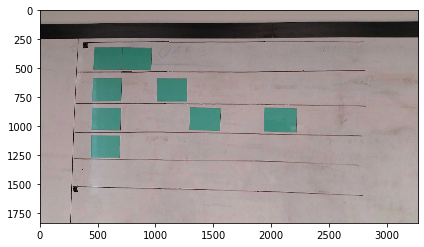

In [93]:
img = img_as_float(imread("a.jpg"))
imshow(img)
show()

<Figure size 1440x1440 with 0 Axes>

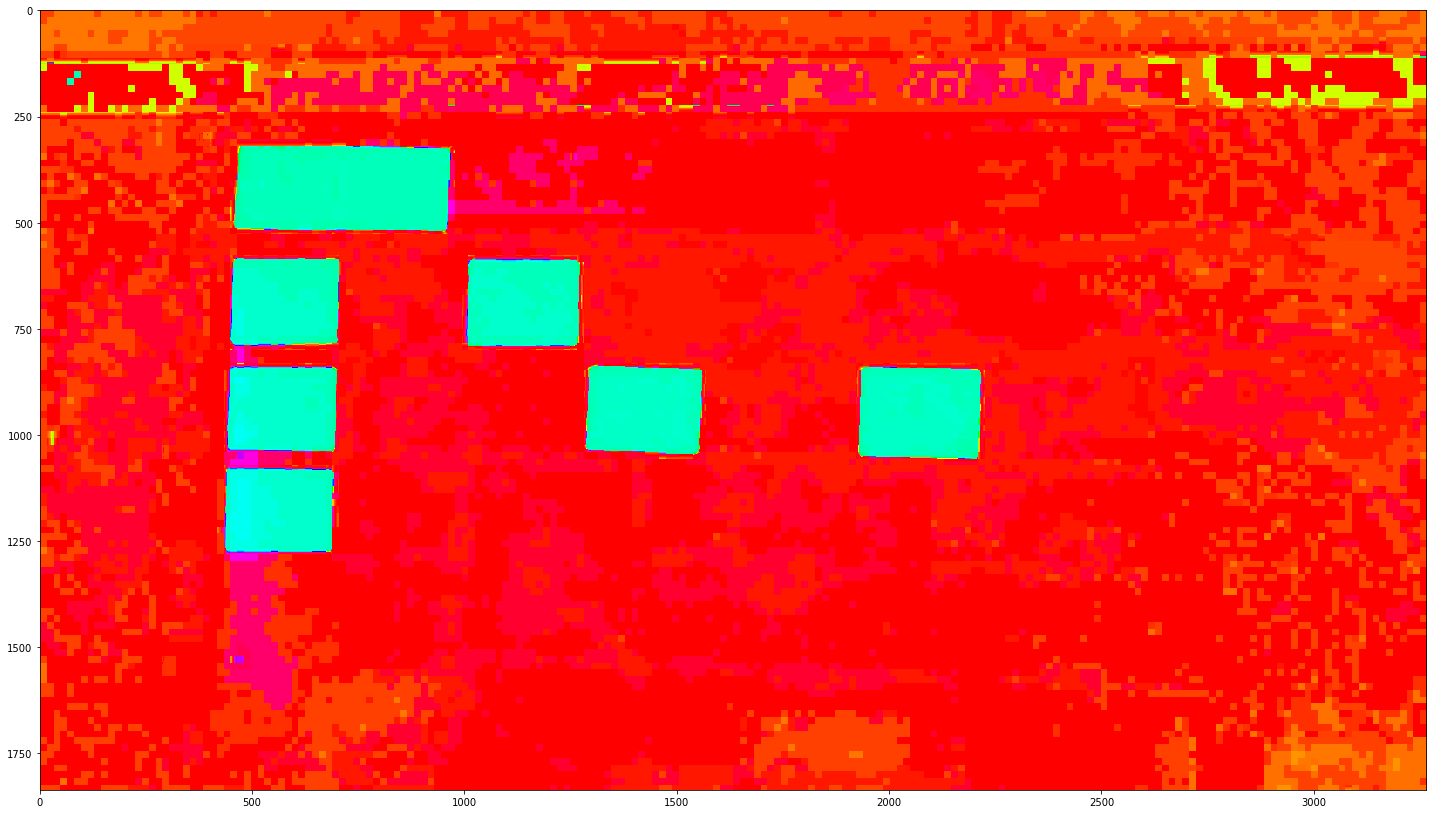

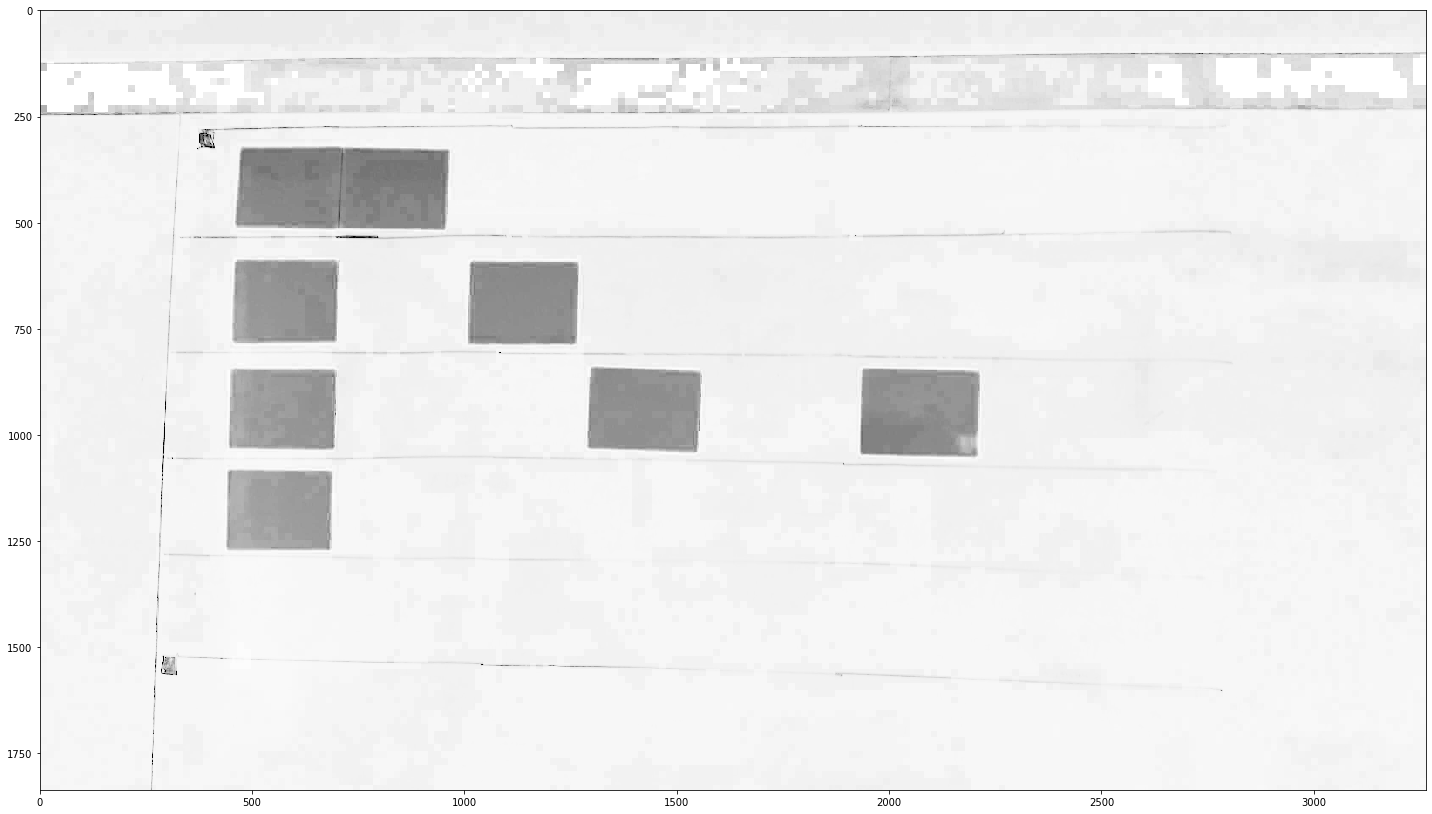

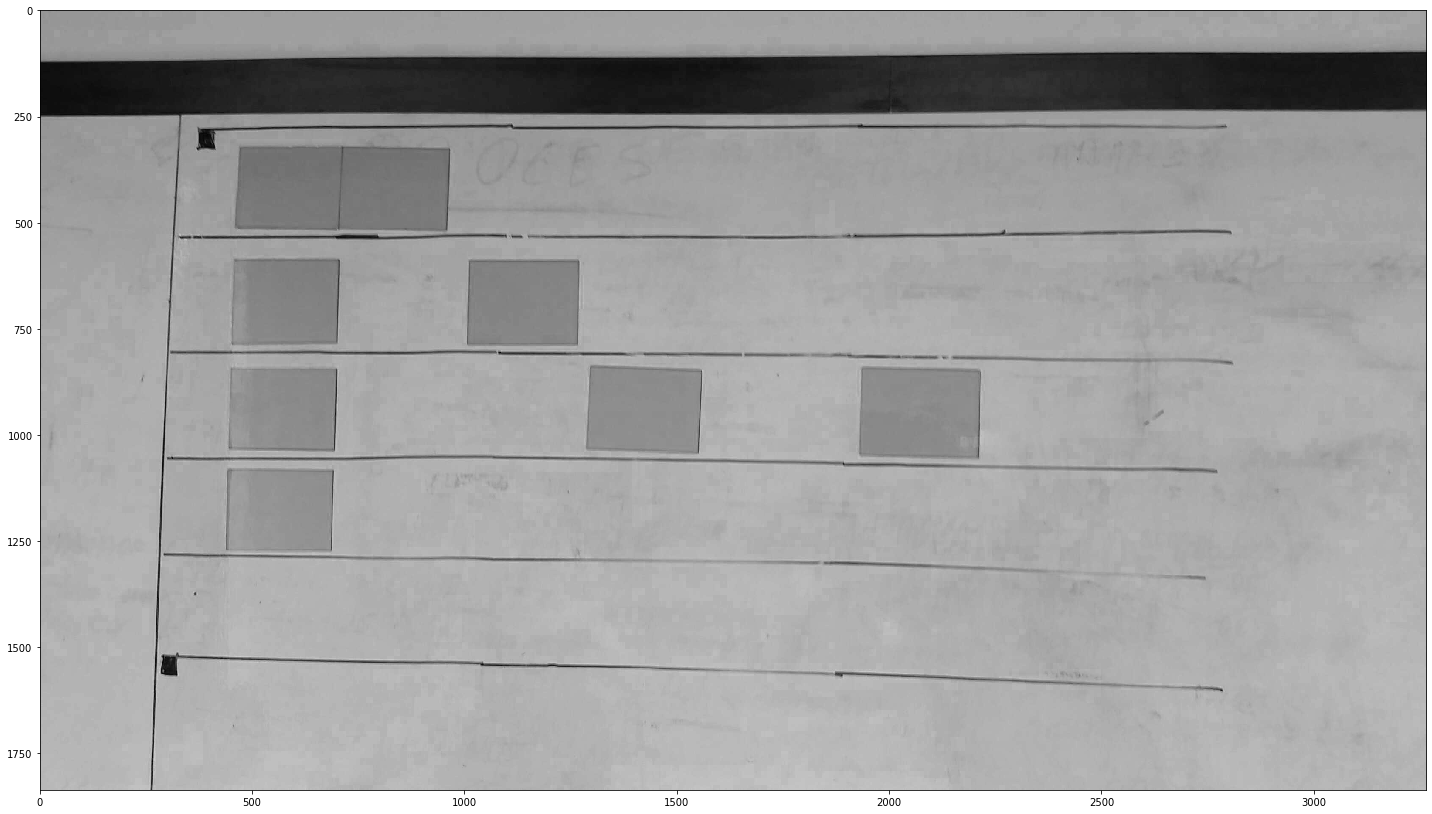

In [99]:
hsv = rgb2hsv(img)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

show_images([
    (h, 'hsv'),
    (s, 'Greys'),
    (v, 'gray'),
])

<Figure size 1440x1440 with 0 Axes>

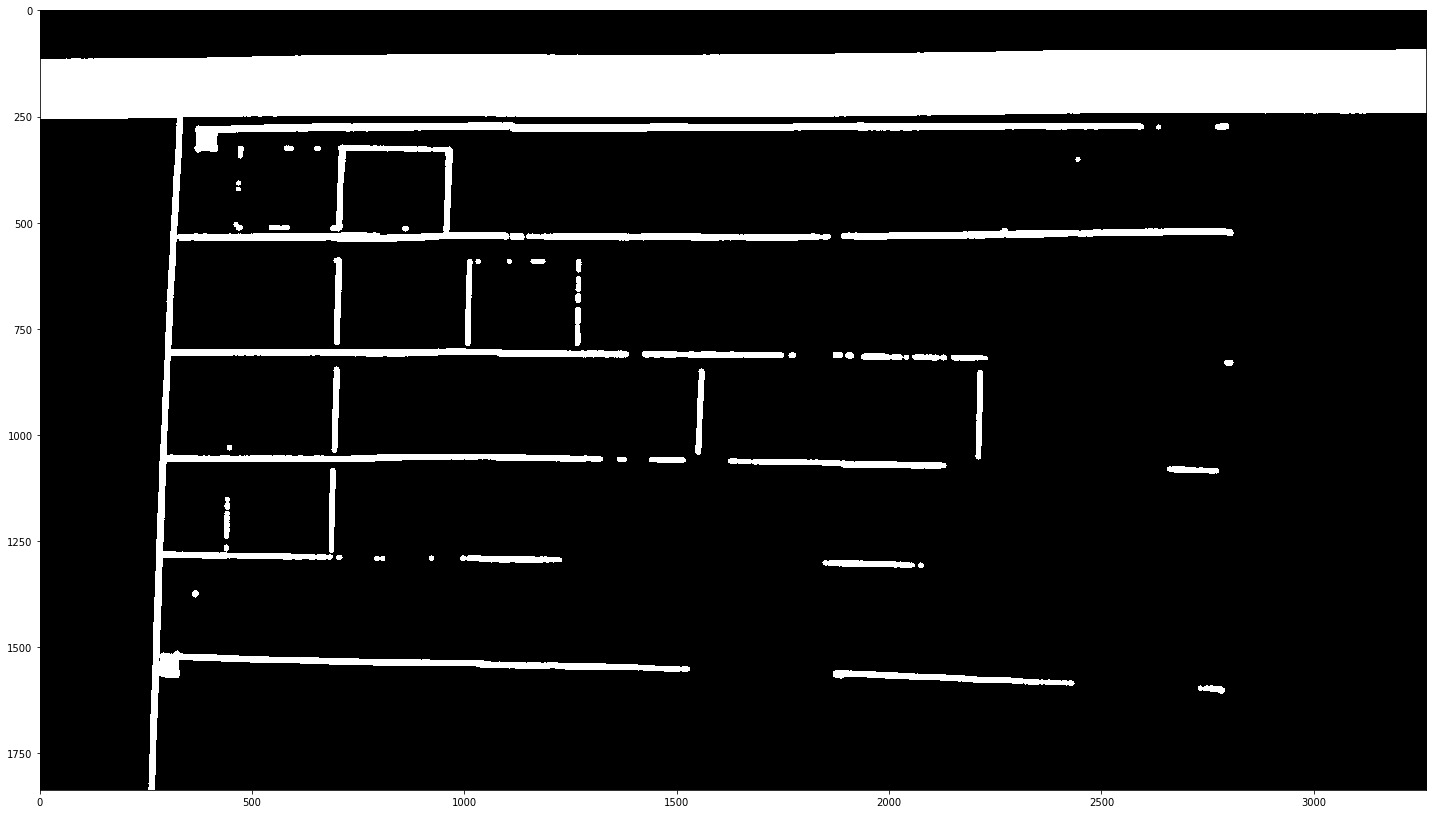

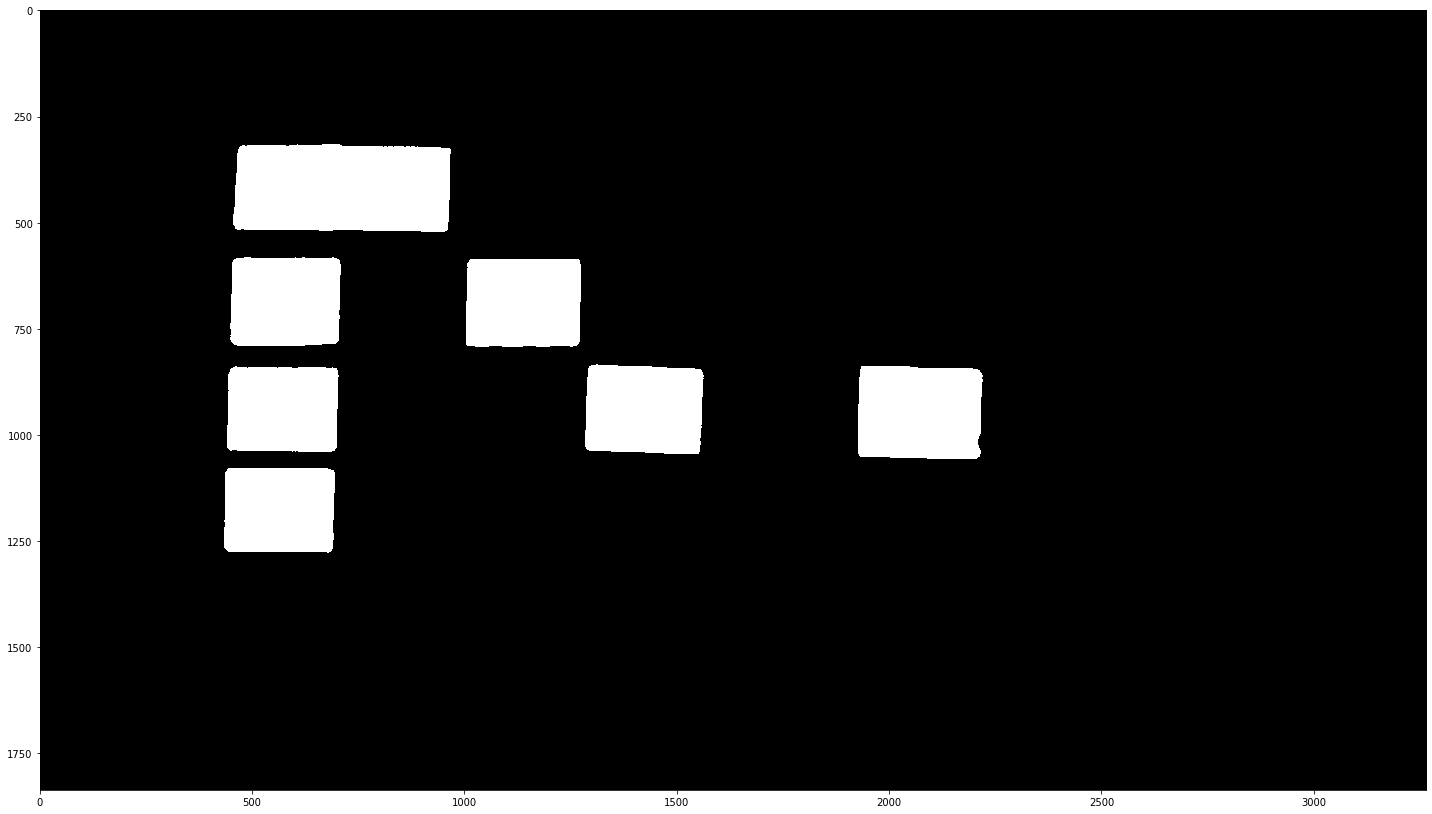

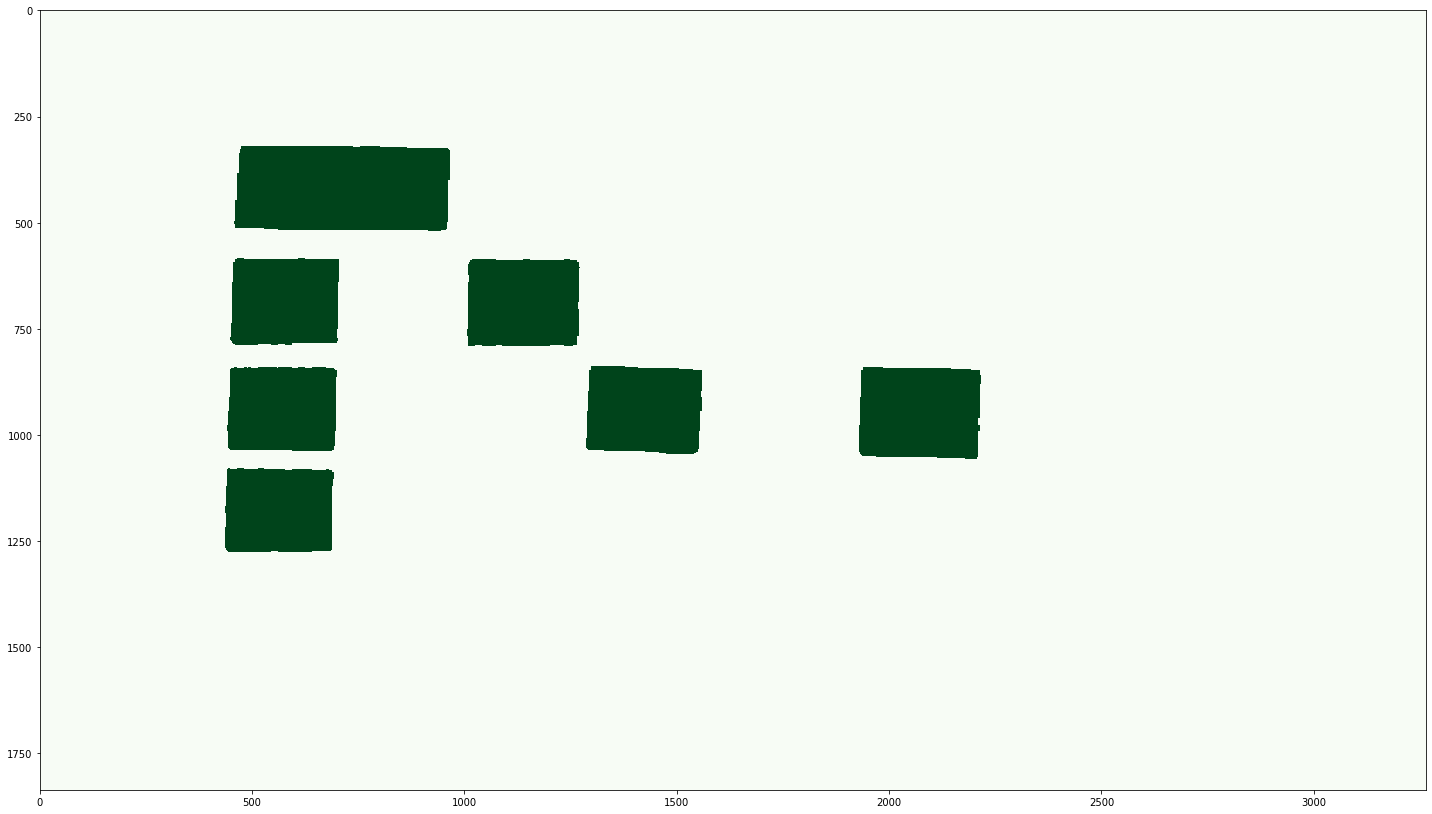

In [115]:
from skimage.color import label2rgb
from skimage.measure import label
from skimage.morphology import dilation, closing, disk
import numpy as np

selem = disk(6)
land, lor = np.logical_and, np.logical_or

#lines = dilation(v < 0.4, selem)

blocks = land(s > 0.3, v > 0.4)
blocks = dilation(blocks, selem)

green_blocks = land(blocks, land(h > 0.4, h < 0.6))

show_images([
    #(lines, 'gray'),
    (blocks, 'gray'),
    (green_blocks, 'Greens'),
])

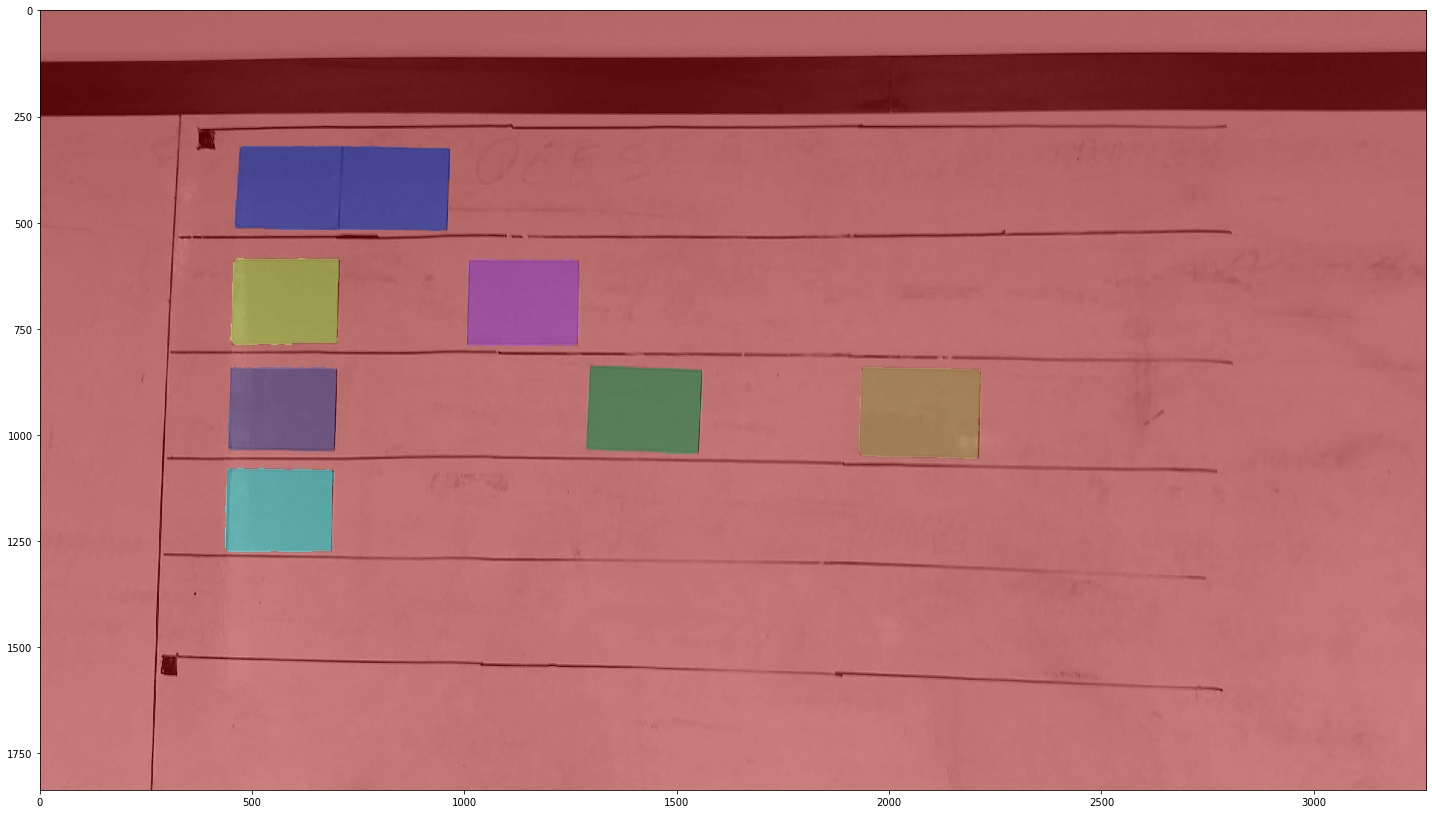

In [128]:
from skimage.color import label2rgb
from skimage.measure import label, regionprops

green_labels = label(green_blocks)
image_label_overlay = label2rgb(green_labels, image=img)

fig = plt.figure(figsize=(20, 20))
imshow(image_label_overlay)

In [129]:
for region in regionprops(green_labels):
    minr, minc, maxr, maxc = region.bbox
    medium_y = (minc + maxc) / 2.0
    start_x = minr
    length = maxr - minr
    print(f'y: {medium_y:8.2f}, start-x: {start_x:8.2f}, length: {length:8.2f}')

y:   711.50, start-x:   320.00, length:   200.00
y:   576.00, start-x:   584.00, length:   205.00
y:  1137.50, start-x:   586.00, length:   205.00
y:  1421.50, start-x:   837.00, length:   208.00
y:   570.00, start-x:   840.00, length:   198.00
y:  2070.50, start-x:   841.00, length:   215.00
y:   564.00, start-x:  1079.00, length:   196.00
